<a href="https://colab.research.google.com/github/francianerod/PROJETOS-SoulCode/blob/main/Projeto_IA_Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tópicos Avançados de IA**

Escola: SoulCode Academy

Curso: Inteligência Artificial

Assunto: Aplicação de uma Rede Neural

Professor: Franciane Rodrigues

## **O QUE É UMA REDE NEURAL?**

Uma rede neural é um modelo computacional inspirado no funcionamento do sistema nervoso humano, especialmente no cérebro. Ela é uma parte importante da área de aprendizado de máquina e inteligência artificial. A estrutura e o funcionamento de uma rede neural artificial (RNA) são projetados para permitir que um sistema computacional aprenda a realizar tarefas sem ser explicitamente programado, em vez disso, aprendendo padrões a partir de dados.

A analogia com o cérebro humano é evidente na estrutura básica de uma rede neural. A rede neural artificial é composta por unidades chamadas neurônios artificiais (também conhecidos como nodos ou perceptrons), que são organizados em camadas. Existem geralmente três tipos principais de camadas em uma RNA:

*  Camada de Entrada (Input Layer): Recebe os dados ou características de entrada.

*  Camadas Ocultas (Hidden Layers): Processam os dados de entrada usando pesos que são ajustados durante o treinamento. Essas camadas são chamadas "ocultas" porque suas operações não são diretamente observáveis a partir dos dados de entrada ou saída.

*  Camada de Saída (Output Layer): Produz o resultado final da rede após o processamento.







Cada conexão entre neurônios tem um peso associado, e durante o treinamento, esses pesos são ajustados para minimizar a diferença entre as saídas previstas e as saídas desejadas para um conjunto de dados de treinamento.

O processo de treinamento em uma rede neural envolve apresentar repetidamente exemplos de entrada com as saídas desejadas correspondentes. A rede ajusta seus pesos de maneira iterativa por meio de algoritmos de otimização, como o gradiente descendente, para melhorar suas previsões.

Redes neurais são amplamente utilizadas em uma variedade de tarefas, como reconhecimento de padrões, processamento de linguagem natural, visão computacional, jogos, entre outros. Seu poder está na capacidade de aprender representações complexas a partir de dados brutos, tornando-as flexíveis e adaptáveis a uma ampla gama de aplicações.

https://www.deeplearningbook.com.br/deep-learning-a-tempestade-perfeita/

In [ ]:
# Importando as bibliotecas necessárias
import tensorflow as tf
import cv2
from tensorflow import keras        # usada para construir e treinar modelos de aprendizado profundo
from tensorflow.keras import layers # contém diversas camadas que podem ser usadas para construir modelos de redes neurais.
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

Dataset: https://keras.io/api/datasets/

Este é um conjunto de dados de 60.000 imagens em tons de cinza 28x28 de 10 categorias de moda, juntamente com um conjunto de teste de 10.000 imagens. Este conjunto de dados pode ser usado como um substituto imediato para o MNIST.![Class.png](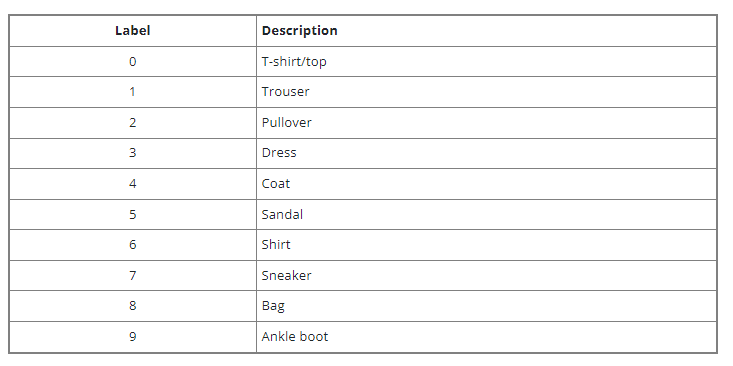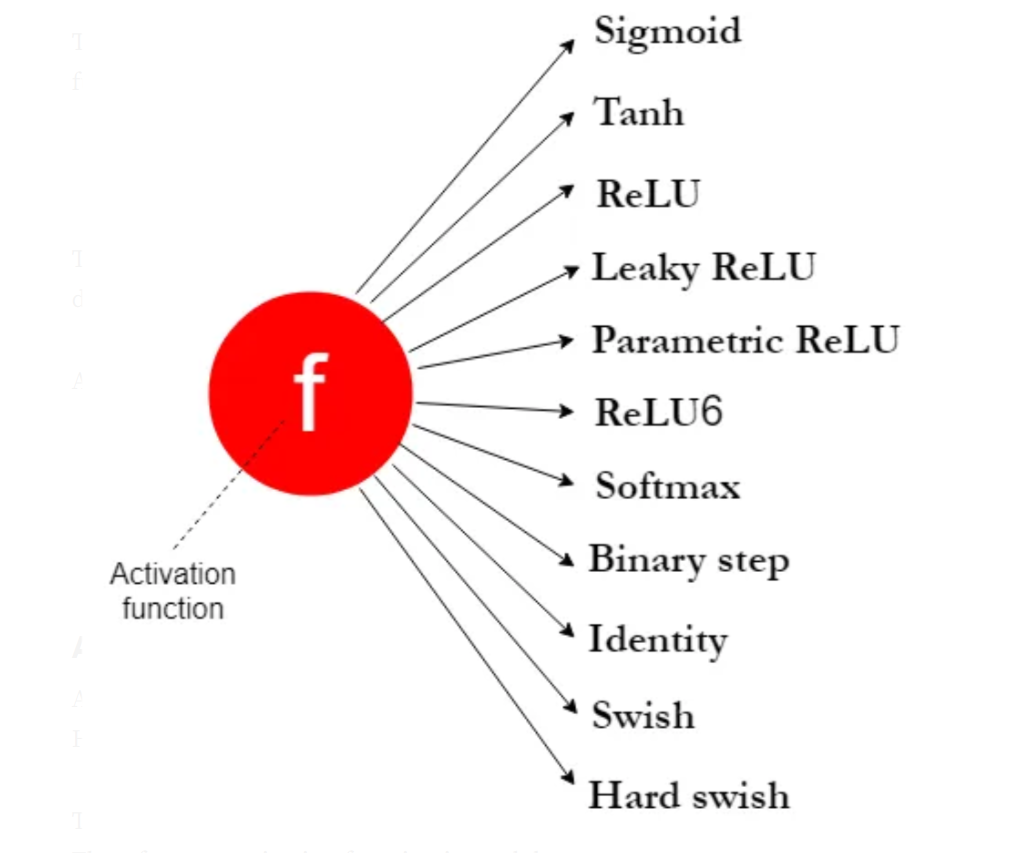)

In [ ]:
# Carregando o conjunto de dados Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


A normalização é realizada dividindo cada valor de pixel pelo valor máximo possível, que é 255.0. Isso é comumente feito para garantir que os valores dos pixels estejam na faixa [0, 1].

In [ ]:
# Normalizando os pixels para o intervalo [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

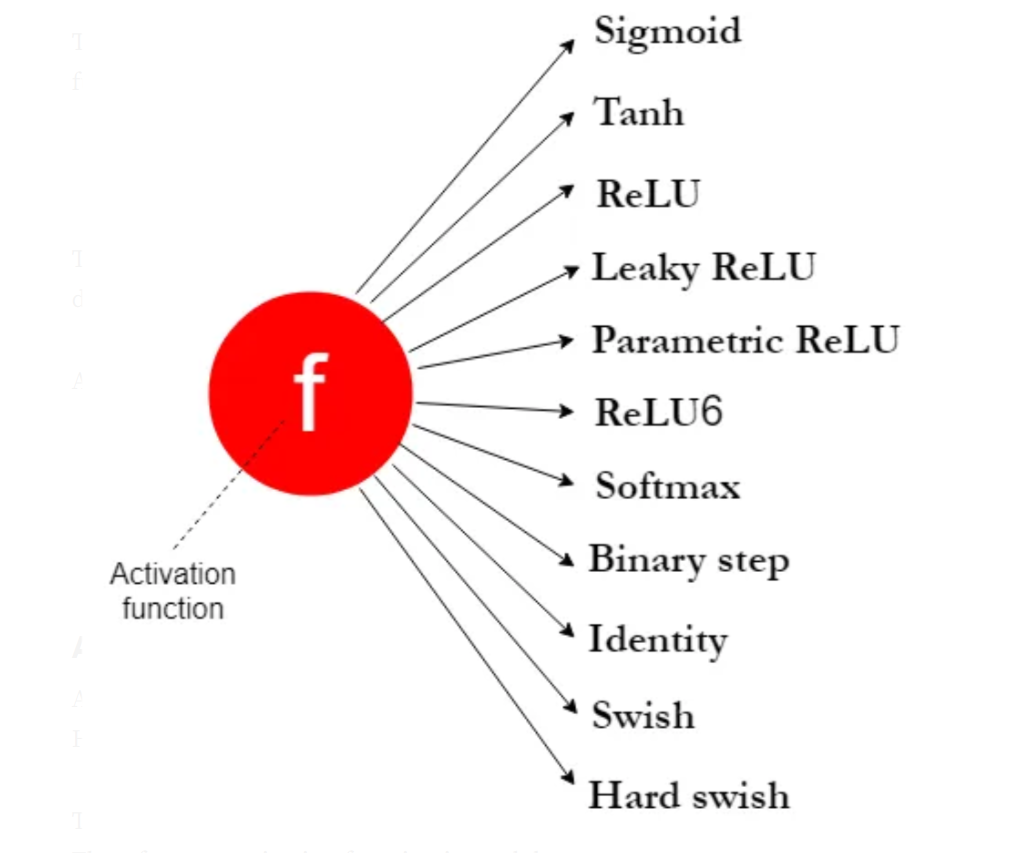

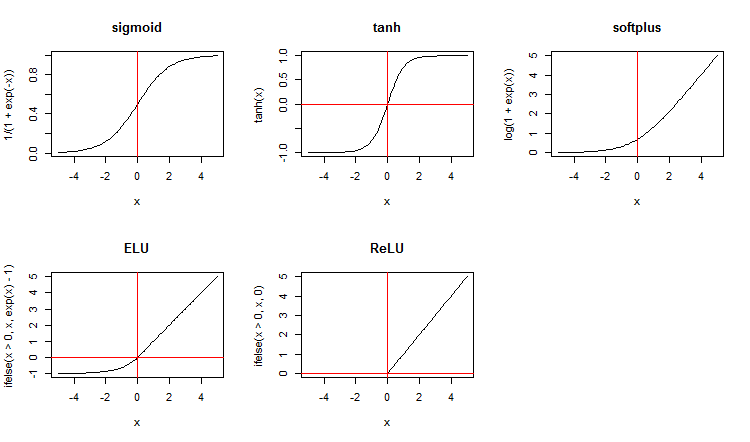

*  **layers.Flatten(input_shape=(28, 28)):** A primeira camada é uma camada de achatamento (Flatten). Essa camada é responsável por transformar a matriz 2D de entrada (28x28 pixels, presumivelmente representando uma imagem) em um vetor 1D de 784 elementos. Isso é necessário para conectar essa camada a camadas densas subsequentes.

*  **layers.Dense(128, activation='relu'):** A segunda camada é uma camada densa (Dense) com 128 neurônios. Essa camada é totalmente conectada, o que significa que cada neurônio nesta camada é conectado a cada neurônio na camada anterior. A função de ativação utilizada é a ReLU (Rectified Linear Unit), que é comumente usada em camadas ocultas de redes neurais.

*  layers.Dense(10, activation='softmax'): A terceira e última camada é outra camada densa com 10 neurônios. Essa camada é a camada de saída e usa a função de ativação Softmax. A ativação Softmax é frequentemente usada em problemas de classificação multiclasse, pois converte as saídas da rede em probabilidades, facilitando a interpretação como a probabilidade de pertencer a cada classe.

In [ ]:
# Construindo o modelo
model = keras.Sequential([layers.Flatten(input_shape=(28, 28)),          # Camada de entrada
                          layers.Dense(128, activation='relu'),          # Camada oculta com ativação ReLU
                          layers.Dense(10, activation='softmax')         # Camada de saída com ativação Softmax para classificação multiclasse
                         ])

*  **optimizer='adam':** O otimizador é um algoritmo que ajusta os pesos da rede neural durante o treinamento com o objetivo de minimizar a função de perda. "Adam" é um otimizador popular e eficiente que combina as ideias do gradiente descendente estocástico (SGD) com momentos adaptativos.

*  **loss='sparse_categorical_crossentropy':** A função de perda (loss function) é uma medida de quão bem o modelo está realizando durante o treinamento. No contexto de classificação multiclasse, 'sparse_categorical_crossentropy' é comumente usado.

*  **metrics=['accuracy']:** As métricas são usadas para monitorar o desempenho do modelo durante o treinamento. Neste caso, a métrica escolhida é 'accuracy' (acurácia), que mede a proporção de amostras classificadas corretamente em relação ao total.

In [ ]:
# Compilando o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

O processo de treinamento é iterativo, e a cada época, o modelo melhora sua capacidade de fazer previsões sobre os dados de treinamento. Ao final das 10 épocas, o modelo terá sido ajustado para fazer previsões mais precisas com base nos padrões nos dados de treinamento.

*  A função de perda (loss function) é uma medida de quão bem o modelo está realizando durante o treinamento. No contexto de classificação multiclasse, 'sparse_categorical_crossentropy' é comumente usado.

*  As métricas são usadas para monitorar o desempenho do modelo durante o treinamento. Neste caso, a métrica escolhida é 'accuracy' (acurácia), que mede a proporção de amostras classificadas corretamente em relação ao total.

In [ ]:
# Treinando o modelo
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4996 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3731 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3367 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3133 - accuracy: 0.8835
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2951 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2803 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2685 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2576 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2472 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.23

In [ ]:
# Exibir resumo do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Avaliando o modelo com o conjunto de teste
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Realizando previsões no conjunto de teste
predictions = model.predict(test_images)

# Convertendo as previsões para rótulos de classe (assumindo classificação multiclasse)
predicted_labels = predictions.argmax(axis=1)

# Calculando métricas adicionais
test_precision = precision_score(test_labels, predicted_labels, average='weighted')
test_recall = recall_score(test_labels, predicted_labels, average='weighted')
test_f1_score = f1_score(test_labels, predicted_labels, average='weighted')

# Imprimindo as métricas em porcentagem
print(f'Loss no conjunto de teste: {round(test_loss,2)}')
print(f'Acurácia no conjunto de teste: {test_acc * 100:.1f}%')
print(f'Precisão no conjunto de teste: {test_precision * 100:.1f}%')
print(f'Revocação no conjunto de teste: {test_recall * 100:.1f}%')
print(f'F1 Score no conjunto de teste: {test_f1_score * 100:.1f}%')

313/313 [==============================] - 2s 6ms/step
Loss no conjunto de teste: 0.34
Acurácia no conjunto de teste: 88.2%
Precisão no conjunto de teste: 88.3%
Revocação no conjunto de teste: 88.2%
F1 Score no conjunto de teste: 88.2%


Análise:

*  **Loss no conjunto de teste:** Essa é uma medida de quão bem o modelo está fazendo em termos de minimizar a diferença entre suas previsões e os rótulos reais no conjunto de teste. Valores mais baixos são desejáveis.

*  **Acurácia no conjunto de teste:** Uma acurácia de 88.2% sugere que o modelo está fazendo previsões precisas na maioria dos casos.

* ** Precisão no conjunto de teste:** Uma precisão de 88.3 % indica que o modelo está fazendo um bom trabalho em minimizar os falsos positivos.

*  **Revocação no conjunto de teste:**: Uma revocação de 88.2% sugere que o modelo está capturando a maioria dos positivos verdadeiros.

*  **F1 Score no conjunto de teste:** : O F1 Score é uma métrica que combina precisão e revocação em um único valor. Uma pontuação de 88.2% é bastante equilibrada, indicando um bom equilíbrio entre precisão e recall.

In [ ]:
# Fazendo previsões com o modelo
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# Função para exibir uma imagem e sua previsão
def plot_image(i, predictions_array, true_label, img, class_names):
    plt.imshow(img[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array[i])
    color = 'blue' if predicted_label == true_label[i] else 'red'
    plt.xlabel(f'{class_names[predicted_label]} {100 * np.max(predictions_array[i]):.2f}% ({class_names[true_label[i]]})', color=color)
    plt.xticks([]), plt.yticks([])

In [ ]:
# Função para exibir o valor previsto e o gráfico de barras de confiança
def plot_value_array(i, predictions_array, true_label):
    plt.bar(range(10), predictions_array[i], color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array[i])
    plt.xticks(range(10))
    plt.yticks([])
    plt.bar(predicted_label, predictions_array[i][predicted_label], color='red')
    plt.bar(true_label[i], predictions_array[i][true_label[i]], color='blue')

In [ ]:
# Convertendo as etiquetas numéricas para rótulos legíveis
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

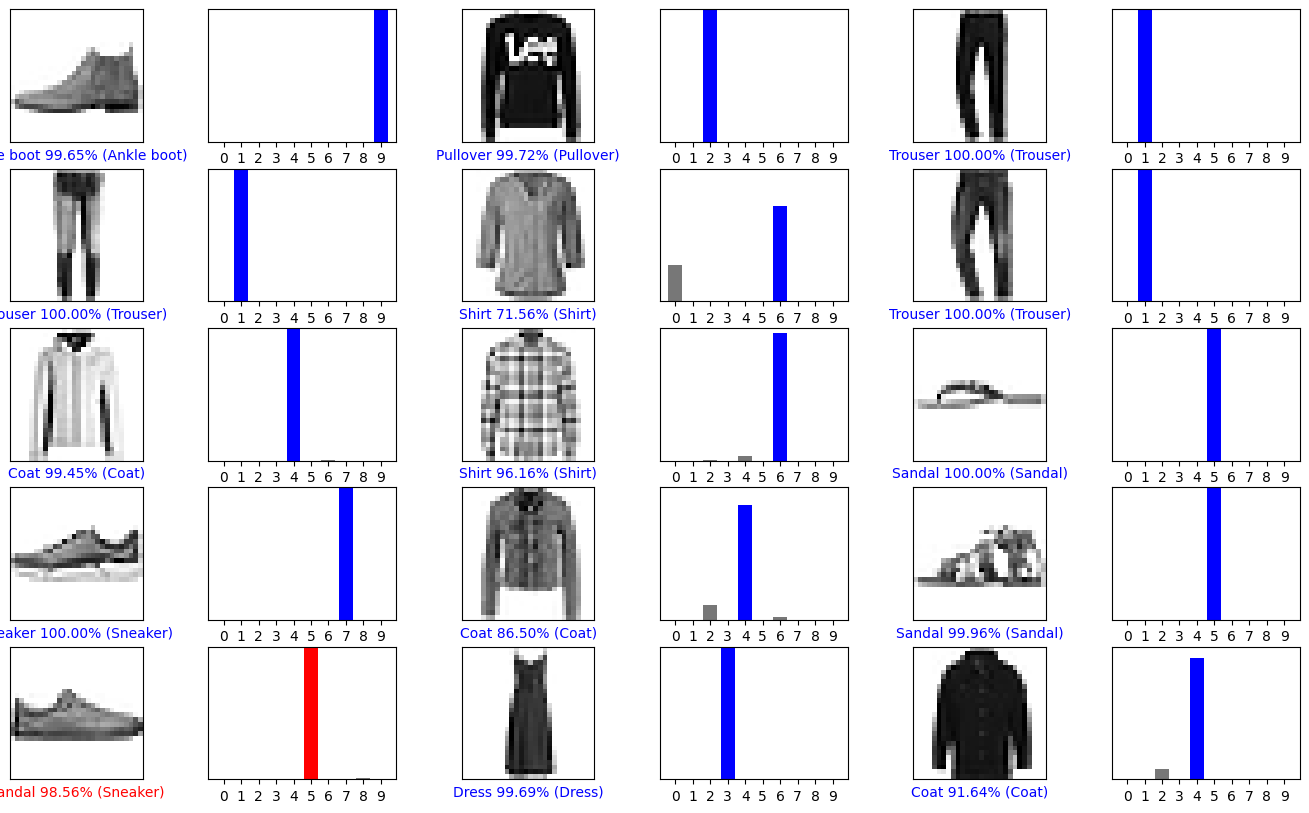

In [ ]:
# Exibindo algumas previsões com tamanho de imagem maior
num_rows, num_cols = 5, 3
num_images = num_rows * num_cols
plt.figure(figsize=(17, 10))  # Ajuste os valores de largura e altura conforme necessário

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images, class_names)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

plt.show()

In [ ]:
# Salvar o modelo no formato nativo do Keras
model.save('modelo_com_previsoes.keras')

In [ ]:
# Carregar o modelo treinado
model = keras.models.load_model('/content/modelo_com_previsoes.keras')

Outrso exemplos:

*  https://keras.io/examples/
*  https://knowyourdata.withgoogle.com/
*  https://pytorch.org/tutorials/